In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
from pprint import pprint
from pandas import DataFrame
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=600)


# Create starting dataframe
weather_df = pd.DataFrame()
weather_df['Cities'] = ''
weather_df['Country Code'] = ''
weather_df['Latitude'] = ''
weather_df['Longitude'] = ''

# Identify nearest city for each lat, lng combination
for x in range(len(lats)):
    weather_df.set_value(x,'Cities',citipy.nearest_city(lats[x], lngs[x]).city_name)
    weather_df.set_value(x,'Country Code',citipy.nearest_city(lats[x], lngs[x]).country_code)
    weather_df.set_value(x,'Latitude',lats[x])
    weather_df.set_value(x,'Longitude',lngs[x])
    
    # If the city is unique, then add it to a our cities list


# Print the city count to confirm sufficient count


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [3]:
weather_df.head()

,Cities,Country Code,Latitude,Longitude
0,port blair,in,14.7498,90.4006
1,barrow,us,84.8097,-150.872
2,rikitea,pf,-31.2883,-112.018
3,warqla,dz,28.5218,4.92329
4,tasiilaq,gl,55.6785,-34.0169


In [4]:
weather_df.drop_duplicates(keep='first',inplace=True)
len(weather_df)

600

In [5]:
#Add additional columns 
weather_df['Temperature (F)']= ''
weather_df['Humidity (%)']=''
weather_df['Cloudiness (%)']= ''
weather_df['Wind Speed (mph)']=''
weather_df.head()

,Cities,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port blair,in,14.7498,90.4006,,,,
1,barrow,us,84.8097,-150.872,,,,
2,rikitea,pf,-31.2883,-112.018,,,,
3,warqla,dz,28.5218,4.92329,,,,
4,tasiilaq,gl,55.6785,-34.0169,,,,


In [6]:
len(weather_df)

600

## Perform API Calls

In [9]:
# OpenWeatherMap API Key
#api_key = api_key.api_key
counter= 1
# Starting URL for Weather Map API Call
for index, row in weather_df.iterrows():
    time.sleep(1)
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    units= 'Imperial'
    query_url = f'{base_url}appid={api_key}&q={weather_df.loc[index,"Cities"]}&units={units}'

    response= req.get(query_url).json()
    #Print log
    print(response)
    print(counter)
    counter = counter + 1
    
 
    
    try:
        for row in weather_df:
            weather_df.loc[index,'Temperature (F)'] = response['main']['temp']
            weather_df.loc[index,'Humidity (%)'] = response['main']['humidity']
            weather_df.loc[index,'Cloudiness (%)'] =response['clouds']['all']  
            weather_df.loc[index,'Wind Speed (mph)']= response['wind']['speed']


        
    except:
        print('Unable to process weather data for this city at this time. Skipping to next.')


{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.49, 'pressure': 1019.19, 'humidity': 100, 'temp_min': 79.49, 'temp_max': 79.49, 'sea_level': 1019.41, 'grnd_level': 1019.19}, 'wind': {'speed': 23.09, 'deg': 221.001}, 'rain': {'3h': 0.57}, 'clouds': {'all': 92}, 'dt': 1535239562, 'sys': {'message': 0.0037, 'country': 'IN', 'sunrise': 1535153923, 'sunset': 1535198575}, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
1
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.46, 'pressure': 1022.67, 'humidity': 47, 'temp_min': 37.46, 'temp_max': 37.46, 'sea_level': 1035.26, 'grnd_level': 1022.67}, 'wind': {'speed': 3.06, 'deg': 359.501}, 'clouds': {'all': 0}, 'dt': 1535239563, 'sys': {'message': 0.0082, 'country': 'AR', 'sunrise': 1535193097, 'sunset': 1535232859}

{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 81.54, 'pressure': 1016, 'humidity': 69, 'temp_min': 80.6, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 4140, 'message': 0.0036, 'country': 'AI', 'sunrise': 1535191003, 'sunset': 1535236264}, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
20
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.73, 'pressure': 1011.97, 'humidity': 76, 'temp_min': 55.73, 'temp_max': 55.73, 'sea_level': 1027.07, 'grnd_level': 1011.97}, 'wind': {'speed': 17.72, 'deg': 305.501}, 'clouds': {'all': 0}, 'dt': 1535239587, 'sys': {'message': 0.004, 'country': 'NZ', 'sunrise': 1535138789, 'sunset': 1535177234}, 'id': 6201424, 'name': 'Mata

{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 85.16, 'pressure': 1023.56, 'humidity': 100, 'temp_min': 85.16, 'temp_max': 85.16, 'sea_level': 1023.63, 'grnd_level': 1023.56}, 'wind': {'speed': 6.76, 'deg': 19.5013}, 'clouds': {'all': 68}, 'dt': 1535239608, 'sys': {'message': 0.0037, 'country': 'KI', 'sunrise': 1535135111, 'sunset': 1535178983}, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
37
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.96, 'pressure': 1011.16, 'humidity': 95, 'temp_min': 59.96, 'temp_max': 59.96, 'sea_level': 1020.06, 'grnd_level': 1011.16}, 'wind': {'speed': 7.54, 'deg': 276.001}, 'clouds': {'all': 0}, 'dt': 1535239609, 'sys': {'message': 0.0041, 'country': 'ZA', 'sunrise': 1535171903, 'sunset': 1535212239}, 'id': 964432, 'n

{'coord': {'lon': -149.27, 'lat': -17.83}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 69, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8343, 'message': 0.0035, 'country': 'PF', 'sunrise': 1535213320, 'sunset': 1535255348}, 'id': 4033543, 'name': 'Teahupoo', 'cod': 200}
55
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 54.37, 'pressure': 1011, 'humidity': 81, 'temp_min': 48.2, 'temp_max': 59}, 'visibility': 24140, 'wind': {'speed': 9.17, 'deg': 330, 'gust': 7.7}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 3513, 'message': 0.0081, 'country': 'CA', 'sunrise': 1535202183, 'sunset': 1535259464}, 'id': 5882953, 'name': 'Akl

{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1011, 'humidity': 81, 'temp_min': 50, 'temp_max': 50}, 'wind': {'speed': 14.99, 'deg': 340}, 'clouds': {'all': 76}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 6591, 'message': 0.0033, 'country': 'ZA', 'sunrise': 1535173604, 'sunset': 1535213826}, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
72
{'coord': {'lon': -70.1, 'lat': 41.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.01, 'pressure': 1025, 'humidity': 83, 'temp_min': 64.04, 'temp_max': 69.98}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1535238900, 'sys': {'type': 1, 'id': 1287, 'message': 0.0039, 'country': 'US', 'sunrise': 1535191243, 'sunset': 1535239374}, 'id': 4944903, 'name': 'Nantucket', 'cod': 200}
73
{'coord': {'

{'cod': '404', 'message': 'city not found'}
89
Unable to process weather data for this city at this time. Skipping to next.
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.39, 'pressure': 1032.81, 'humidity': 100, 'temp_min': 53.39, 'temp_max': 53.39, 'sea_level': 1033.84, 'grnd_level': 1032.81}, 'wind': {'speed': 8.21, 'deg': 103.001}, 'clouds': {'all': 88}, 'dt': 1535239572, 'sys': {'message': 0.007, 'country': 'AU', 'sunrise': 1535150694, 'sunset': 1535190995}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
90
{'coord': {'lon': 101.31, 'lat': 1.11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.26, 'pressure': 1016.84, 'humidity': 89, 'temp_min': 75.26, 'temp_max': 75.26, 'sea_level': 1022.57, 'grnd_level': 1016.84}, 'wind': {'speed': 2.62, 'deg': 165.501}, 'clouds': {'a

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.83, 'pressure': 1032.56, 'humidity': 100, 'temp_min': 72.83, 'temp_max': 72.83, 'sea_level': 1032.66, 'grnd_level': 1032.56}, 'wind': {'speed': 13.8, 'deg': 55.0013}, 'clouds': {'all': 0}, 'dt': 1535239564, 'sys': {'message': 0.0044, 'country': 'PF', 'sunrise': 1535210145, 'sunset': 1535251664}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
108
{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.99, 'pressure': 1019.51, 'humidity': 90, 'temp_min': 47.99, 'temp_max': 47.99, 'sea_level': 1030.96, 'grnd_level': 1019.51}, 'wind': {'speed': 5.97, 'deg': 155.501}, 'clouds': {'all': 0}, 'dt': 1535239584, 'sys': {'message': 0.0028, 'country': 'RU', 'sunrise': 1535140327, 'sunset': 1535201701}, 'id': 2017155, 'name'

{'cod': '404', 'message': 'city not found'}
125
Unable to process weather data for this city at this time. Skipping to next.
{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 52.85, 'pressure': 976.22, 'humidity': 64, 'temp_min': 52.85, 'temp_max': 52.85, 'sea_level': 1036.31, 'grnd_level': 976.22}, 'wind': {'speed': 3.96, 'deg': 286.501}, 'clouds': {'all': 8}, 'dt': 1535239670, 'sys': {'message': 0.0032, 'country': 'AU', 'sunrise': 1535145092, 'sunset': 1535185439}, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
126
{'coord': {'lon': 75.81, 'lat': 41.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.92, 'pressure': 765.87, 'humidity': 84, 'temp_min': 36.92, 'temp_max': 36.92, 'sea_level': 1021.96, 'grnd_level': 765.87}, 'wind': {'speed': 0.6, 'deg': 288.501}, 'clouds': {'all': 80}, 'dt':

{'coord': {'lon': 67.41, 'lat': 59.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 57.35, 'pressure': 1019.27, 'humidity': 86, 'temp_min': 57.35, 'temp_max': 57.35, 'sea_level': 1024.6, 'grnd_level': 1019.27}, 'wind': {'speed': 7.54, 'deg': 11.5013}, 'clouds': {'all': 32}, 'dt': 1535239745, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1535155882, 'sunset': 1535208691}, 'id': 1502697, 'name': 'Kondinskoye', 'cod': 200}
144
{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.99, 'pressure': 1019.51, 'humidity': 90, 'temp_min': 47.99, 'temp_max': 47.99, 'sea_level': 1030.96, 'grnd_level': 1019.51}, 'wind': {'speed': 5.97, 'deg': 155.501}, 'clouds': {'all': 0}, 'dt': 1535239716, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1535140327, 'sunset': 1535201700}, 'id': 2017155

{'coord': {'lon': -114.59, 'lat': 33.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 105.08, 'pressure': 1007, 'humidity': 22, 'temp_min': 105.08, 'temp_max': 105.08}, 'visibility': 16093, 'wind': {'speed': 16.11, 'deg': 170, 'gust': 10.3}, 'clouds': {'all': 1}, 'dt': 1535237520, 'sys': {'type': 1, 'id': 361, 'message': 0.0036, 'country': 'US', 'sunrise': 1535202496, 'sunset': 1535249483}, 'id': 5329649, 'name': 'Blythe', 'cod': 200}
160
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.83, 'pressure': 1032.56, 'humidity': 100, 'temp_min': 72.83, 'temp_max': 72.83, 'sea_level': 1032.66, 'grnd_level': 1032.56}, 'wind': {'speed': 13.8, 'deg': 55.0013}, 'clouds': {'all': 0}, 'dt': 1535239564, 'sys': {'message': 0.0044, 'country': 'PF', 'sunrise': 1535210145, 'sunset': 1535251664}, 'id': 403055

{'coord': {'lon': 35.15, 'lat': 42.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.44, 'pressure': 1017.24, 'humidity': 97, 'temp_min': 75.44, 'temp_max': 75.44, 'sea_level': 1021.52, 'grnd_level': 1017.24}, 'wind': {'speed': 9.22, 'deg': 116.001}, 'clouds': {'all': 8}, 'dt': 1535239789, 'sys': {'message': 0.0032, 'country': 'TR', 'sunrise': 1535165902, 'sunset': 1535214204}, 'id': 739600, 'name': 'Sinop', 'cod': 200}
178
{'coord': {'lon': 74.72, 'lat': 13.35}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1008, 'humidity': 94, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 3000, 'wind': {'speed': 3.36, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 7833, 'message': 0.004, 'country': 'IN', 'sunrise': 1535158171, 'sunset': 1535202979}, 'id': 1264037, 'name': 'Malpe', 'cod': 200}
179

{'coord': {'lon': 166.46, 'lat': -22.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1019, 'humidity': 72, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 6.08, 'deg': 80.5013}, 'clouds': {'all': 0}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8344, 'message': 0.0037, 'country': 'NC', 'sunrise': 1535137804, 'sunset': 1535179347}, 'id': 2139521, 'name': 'Noumea', 'cod': 200}
195
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1009, 'humidity': 57, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8195, 'message': 0.0039, 'country': 'AU', 'sunrise': 1535143671, 'sunset': 1535182680}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
1

{'coord': {'lon': -99.88, 'lat': 16.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1010, 'humidity': 66, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 12874, 'wind': {'speed': 11.41, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1535237520, 'sys': {'type': 1, 'id': 3965, 'message': 0.0148, 'country': 'MX', 'sunrise': 1535199908, 'sunset': 1535245030}, 'id': 3533462, 'name': 'Acapulco', 'cod': 200}
214
{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.99, 'pressure': 1019.51, 'humidity': 90, 'temp_min': 47.99, 'temp_max': 47.99, 'sea_level': 1030.96, 'grnd_level': 1019.51}, 'wind': {'speed': 5.97, 'deg': 155.501}, 'clouds': {'all': 0}, 'dt': 1535239716, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1535140327, 'sunset': 1535201700}, 'id': 2017155, 'name': 'Saskyl

{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.39, 'pressure': 1032.81, 'humidity': 100, 'temp_min': 53.39, 'temp_max': 53.39, 'sea_level': 1033.84, 'grnd_level': 1032.81}, 'wind': {'speed': 8.21, 'deg': 103.001}, 'clouds': {'all': 88}, 'dt': 1535239572, 'sys': {'message': 0.007, 'country': 'AU', 'sunrise': 1535150694, 'sunset': 1535190995}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
233
{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.62, 'pressure': 1035.24, 'humidity': 92, 'temp_min': 48.62, 'temp_max': 48.62, 'sea_level': 1037.61, 'grnd_level': 1035.24}, 'wind': {'speed': 21.07, 'deg': 237.001}, 'clouds': {'all': 8}, 'dt': 1535239843, 'sys': {'message': 0.008, 'country': 'BR', 'sunrise': 1535190751, 'sunset': 1535231297}, 'id': 3451138

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.83, 'pressure': 1032.56, 'humidity': 100, 'temp_min': 72.83, 'temp_max': 72.83, 'sea_level': 1032.66, 'grnd_level': 1032.56}, 'wind': {'speed': 13.8, 'deg': 55.0013}, 'clouds': {'all': 0}, 'dt': 1535239564, 'sys': {'message': 0.0044, 'country': 'PF', 'sunrise': 1535210145, 'sunset': 1535251664}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
252
{'coord': {'lon': -0.65, 'lat': 47.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1018, 'humidity': 81, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 2.95, 'deg': 71.5013}, 'clouds': {'all': 0}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 5557, 'message': 0.0035, 'country': 'FR', 'sunrise': 1535174019, 'sunset': 1535223257}, 'id': 3023557, 'name': 'Coron

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.03, 'pressure': 1033.45, 'humidity': 94, 'temp_min': 44.03, 'temp_max': 44.03, 'sea_level': 1035.62, 'grnd_level': 1033.45}, 'wind': {'speed': 8.43, 'deg': 315.001}, 'rain': {'3h': 0.2125}, 'clouds': {'all': 92}, 'dt': 1535239758, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1535132979, 'sunset': 1535192855}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
269
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.46, 'pressure': 1022.67, 'humidity': 47, 'temp_min': 37.46, 'temp_max': 37.46, 'sea_level': 1035.26, 'grnd_level': 1022.67}, 'wind': {'speed': 3.06, 'deg': 359.501}, 'clouds': {'all': 0}, 'dt': 1535239706, 'sys': {'message': 0.003, 'country': 'AR', 'sunrise': 1535193097, 'sunset': 1535232859

{'coord': {'lon': 31.81, 'lat': 31.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1010, 'humidity': 88, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 6399, 'message': 0.0039, 'country': 'EG', 'sunrise': 1535167487, 'sunset': 1535214237}, 'id': 358048, 'name': 'Damietta', 'cod': 200}
289
{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.5, 'pressure': 1005.73, 'humidity': 91, 'temp_min': 51.5, 'temp_max': 51.5, 'sea_level': 1026.22, 'grnd_level': 1005.73}, 'wind': {'speed': 3.4, 'deg': 99.5013}, 'clouds': {'all': 56}, 'dt': 1535239866, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1535147871, 'sunset': 1535206543}, 'id': 1490256, 'name': 'Talnakh', '

{'coord': {'lon': 114.59, 'lat': -3.32}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1008, 'humidity': 88, 'temp_min': 77, 'temp_max': 77}, 'visibility': 5000, 'wind': {'speed': 6.08, 'deg': 122.001}, 'clouds': {'all': 40}, 'dt': 1535234400, 'sys': {'type': 1, 'id': 8077, 'message': 0.0032, 'country': 'ID', 'sunrise': 1535149362, 'sunset': 1535192667}, 'id': 1650213, 'name': 'Banjarmasin', 'cod': 200}
306
{'coord': {'lon': 80.55, 'lat': 73.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.83, 'pressure': 1028.43, 'humidity': 100, 'temp_min': 45.83, 'temp_max': 45.83, 'sea_level': 1028.81, 'grnd_level': 1028.43}, 'wind': {'speed': 14.03, 'deg': 359.501}, 'clouds': {'all': 92}, 'dt': 1535239746, 'sys': {'message': 0.0044, 'country': 'RU', 'sunrise': 1535147294, 'sunset': 1535210778}, 'id': 1507390, 'name': 'Dikson

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.43, 'pressure': 955.47, 'humidity': 98, 'temp_min': 67.43, 'temp_max': 67.43, 'sea_level': 1020.46, 'grnd_level': 955.47}, 'wind': {'speed': 6.42, 'deg': 247.501}, 'rain': {'3h': 4.355}, 'clouds': {'all': 92}, 'dt': 1535239706, 'sys': {'message': 0.003, 'country': 'IN', 'sunrise': 1535158130, 'sunset': 1535203129}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
324
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1002, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1535234400, 'sys': {'type': 1, 'id': 4642, 'message': 0.0035, 'country': 'CL', 'sunrise': 1535196963, 'sunset': 1535234137}, 'id': 

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37.19, 'pressure': 988.14, 'humidity': 92, 'temp_min': 37.19, 'temp_max': 37.19, 'sea_level': 1019.53, 'grnd_level': 988.14}, 'wind': {'speed': 7.76, 'deg': 86.0013}, 'clouds': {'all': 0}, 'dt': 1535239730, 'sys': {'message': 0.0041, 'country': 'GL', 'sunrise': 1535178293, 'sunset': 1535251307}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
341
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1013, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8340, 'message': 0.0036, 'country': 'CK', 'sunrise': 1535216002, 'sunset': 1535257713}, 'id': 4035715, 'name': 'Avarua'

{'coord': {'lon': -71.14, 'lat': 21.46}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 83.72, 'pressure': 1030.13, 'humidity': 96, 'temp_min': 83.72, 'temp_max': 83.72, 'sea_level': 1030.19, 'grnd_level': 1030.13}, 'wind': {'speed': 17.6, 'deg': 99.5013}, 'clouds': {'all': 44}, 'dt': 1535239870, 'sys': {'message': 0.004, 'country': 'TC', 'sunrise': 1535192777, 'sunset': 1535238365}, 'id': 3576994, 'name': 'Cockburn Town', 'cod': 200}
358
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1025, 'humidity': 93, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 6338, 'message': 0.0033, 'country': 'ET', 'sunrise': 1535167014, 'sunset': 1535211411}, 'id': 344979, 'nam

{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1021, 'humidity': 69, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 6729, 'message': 0.004, 'country': 'MU', 'sunrise': 1535163798, 'sunset': 1535205546}, 'id': 934322, 'name': 'Mahebourg', 'cod': 200}
374
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1009, 'humidity': 57, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8195, 'message': 0.0039, 'country': 'AU', 'sunrise': 1535143728, 'sunset': 1535182753}, 'id': 2155415, 'name': 'New Norfolk

{'coord': {'lon': -76.33, 'lat': -6.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1011, 'humidity': 290, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 4406, 'message': 0.0038, 'country': 'PE', 'sunrise': 1535195329, 'sunset': 1535238326}, 'id': 3693646, 'name': 'Picota', 'cod': 200}
392
{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.5, 'pressure': 1005.73, 'humidity': 91, 'temp_min': 51.5, 'temp_max': 51.5, 'sea_level': 1026.22, 'grnd_level': 1005.73}, 'wind': {'speed': 3.4, 'deg': 99.5013}, 'clouds': {'all': 56}, 'dt': 1535239866, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1535147871, 'sunset': 1535206543}, 'id': 1490256, 'name': 'T

{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 75.92, 'pressure': 1013, 'humidity': 97, 'temp_min': 75.92, 'temp_max': 75.92}, 'visibility': 3219, 'wind': {'speed': 6.93, 'deg': 100}, 'rain': {'1h': 0.51}, 'clouds': {'all': 90}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 818, 'message': 0.0036, 'country': 'US', 'sunrise': 1535213016, 'sunset': 1535258411}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
410
{'coord': {'lon': -68.06, 'lat': -38.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1020, 'humidity': 50, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 4769, 'message': 0.0036, 'country': 'AR',

{'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.86, 'pressure': 1023, 'humidity': 43, 'temp_min': 86, 'temp_max': 87.98}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1535237700, 'sys': {'type': 1, 'id': 783, 'message': 0.0039, 'country': 'US', 'sunrise': 1535194826, 'sunset': 1535241768}, 'id': 4231997, 'name': 'Avera', 'cod': 200}
429
{'coord': {'lon': 87.21, 'lat': 27.38}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 45.29, 'pressure': 691.87, 'humidity': 65, 'temp_min': 45.29, 'temp_max': 45.29, 'sea_level': 1013.49, 'grnd_level': 691.87}, 'wind': {'speed': 2.06, 'deg': 358.001}, 'rain': {'3h': 0.31}, 'clouds': {'all': 44}, 'dt': 1535240116, 'sys': {'message': 0.0036, 'country': 'NP', 'sunrise': 1535154434, 'sunset': 1535200708}, 'id': 1283217, 'na

{'coord': {'lon': 72.97, 'lat': 3.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.37, 'pressure': 1022.43, 'humidity': 100, 'temp_min': 82.37, 'temp_max': 82.37, 'sea_level': 1022.49, 'grnd_level': 1022.43}, 'wind': {'speed': 10.11, 'deg': 280.501}, 'clouds': {'all': 76}, 'dt': 1535239911, 'sys': {'message': 0.0036, 'country': 'MV', 'sunrise': 1535159032, 'sunset': 1535202965}, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
448
{'coord': {'lon': 45.7, 'lat': 55.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.07, 'pressure': 1017.24, 'humidity': 83, 'temp_min': 49.07, 'temp_max': 49.07, 'sea_level': 1033.43, 'grnd_level': 1017.24}, 'wind': {'speed': 2.73, 'deg': 79.0013}, 'clouds': {'all': 0}, 'dt': 1535240145, 'sys': {'message': 0.0045, 'country': 'RU', 'sunrise': 1535161771, 'sunset': 1535213236}, 'id': 489778, 'na

{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 93.62, 'pressure': 950.85, 'humidity': 40, 'temp_min': 93.62, 'temp_max': 93.62, 'sea_level': 1021.52, 'grnd_level': 950.85}, 'wind': {'speed': 15.48, 'deg': 176.001}, 'clouds': {'all': 36}, 'dt': 1535239785, 'sys': {'message': 0.025, 'country': 'US', 'sunrise': 1535198661, 'sunset': 1535246145}, 'id': 4267710, 'name': 'Sitka', 'cod': 200}
464
{'coord': {'lon': -124.16, 'lat': 40.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.26, 'pressure': 1016, 'humidity': 77, 'temp_min': 60.08, 'temp_max': 64.4}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 310}, 'clouds': {'all': 1}, 'dt': 1535237700, 'sys': {'type': 1, 'id': 350, 'message': 0.0038, 'country': 'US', 'sunrise': 1535204267, 'sunset': 1535252295}, 'id': 5563397, 'name': 'Eurek

{'cod': '404', 'message': 'city not found'}
481
Unable to process weather data for this city at this time. Skipping to next.
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1002, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1535234400, 'sys': {'type': 1, 'id': 4642, 'message': 0.0035, 'country': 'CL', 'sunrise': 1535196963, 'sunset': 1535234137}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
482
{'cod': '404', 'message': 'city not found'}
483
Unable to process weather data for this city at this time. Skipping to next.
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1000, 'humidity': 80, 'temp_min': 39.2, 'temp_m

{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1000, 'humidity': 80, 'temp_min': 39.2, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 4754, 'message': 0.0043, 'country': 'AR', 'sunrise': 1535196540, 'sunset': 1535233315}, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
500
{'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.22, 'pressure': 1017.89, 'humidity': 100, 'temp_min': 79.22, 'temp_max': 79.22, 'sea_level': 1023.3, 'grnd_level': 1017.89}, 'wind': {'speed': 4.63, 'deg': 329.501}, 'clouds': {'all': 68}, 'dt': 1535239777, 'sys': {'message': 0.0031, 'country': 'ID', 'sunrise': 1535152670, 'sunset': 1535196187}, 'id': 1633419, 'name': 

{'coord': {'lon': 166.44, 'lat': 68.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 36.92, 'pressure': 974.2, 'humidity': 80, 'temp_min': 36.92, 'temp_max': 36.92, 'sea_level': 1027.68, 'grnd_level': 974.2}, 'wind': {'speed': 3.4, 'deg': 0.00134277}, 'clouds': {'all': 80}, 'dt': 1535239872, 'sys': {'message': 0.0104, 'country': 'RU', 'sunrise': 1535129704, 'sunset': 1535187275}, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
517
{'cod': '404', 'message': 'city not found'}
518
Unable to process weather data for this city at this time. Skipping to next.
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.39, 'pressure': 1032.81, 'humidity': 100, 'temp_min': 53.39, 'temp_max': 53.39, 'sea_level': 1033.84, 'grnd_level': 1032.81}, 'wind': {'speed': 8.21, 'deg': 103.001}, 'clouds': {'all

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.83, 'pressure': 1032.56, 'humidity': 100, 'temp_min': 72.83, 'temp_max': 72.83, 'sea_level': 1032.66, 'grnd_level': 1032.56}, 'wind': {'speed': 13.8, 'deg': 55.0013}, 'clouds': {'all': 0}, 'dt': 1535239564, 'sys': {'message': 0.0044, 'country': 'PF', 'sunrise': 1535210145, 'sunset': 1535251664}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
535
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1013, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8340, 'message': 0.0036, 'country': 'CK', 'sunrise': 1535216002, 'sunset': 1535257713}, 'id': 4035715, 'name': 'Av

{'coord': {'lon': 20.89, 'lat': 3.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.13, 'pressure': 974.28, 'humidity': 90, 'temp_min': 70.13, 'temp_max': 70.13, 'sea_level': 1025.65, 'grnd_level': 974.28}, 'wind': {'speed': 1.16, 'deg': 133.001}, 'clouds': {'all': 80}, 'dt': 1535240288, 'sys': {'message': 0.0042, 'country': 'CD', 'sunrise': 1535171550, 'sunset': 1535215441}, 'id': 217637, 'name': 'Businga', 'cod': 200}
552
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1009, 'humidity': 57, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 8195, 'message': 0.0039, 'country': 'AU', 'sunrise': 1535143671, 'sunset': 1535182680}, 'id': 2163355, 'name': 'Hobart',

{'coord': {'lon': -55.08, 'lat': 5.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.44, 'pressure': 1013, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1535238000, 'sys': {'type': 1, 'id': 4785, 'message': 0.0035, 'country': 'SR', 'sunrise': 1535189667, 'sunset': 1535233781}, 'id': 3383434, 'name': 'Nieuw Amsterdam', 'cod': 200}
570
{'coord': {'lon': -73.75, 'lat': 42.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.21, 'pressure': 1022, 'humidity': 50, 'temp_min': 71.96, 'temp_max': 77}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1535237640, 'sys': {'type': 1, 'id': 2088, 'message': 0.004, 'country': 'US', 'sunrise': 1535192003, 'sunset': 1535240363}, 'id': 5106834, 'name': 'Albany

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1002, 'humidity': 75, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1535234400, 'sys': {'type': 1, 'id': 4642, 'message': 0.0035, 'country': 'CL', 'sunrise': 1535196963, 'sunset': 1535234137}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
586
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.39, 'pressure': 1032.81, 'humidity': 100, 'temp_min': 53.39, 'temp_max': 53.39, 'sea_level': 1033.84, 'grnd_level': 1032.81}, 'wind': {'speed': 8.21, 'deg': 103.001}, 'clouds': {'all': 88}, 'dt': 1535240335, 'sys': {'message': 0.0031, 'country': 'AU', 'sunrise': 1535150693, 'sunset': 1535190996}, 'id': 207526

In [10]:
#Change empty strings in the dataframe to Nan so they can be removed
weather_df.replace('', np.nan, inplace=True)
weather_df


,Cities,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port blair,in,14.749788,90.400570,79.49,100.0,92.0,23.09
1,barrow,us,84.809686,-150.871833,37.46,47.0,0.0,3.06
2,rikitea,pf,-31.288313,-112.017625,72.83,100.0,0.0,13.80
3,warqla,dz,28.521751,4.923294,NaN,NaN,NaN,NaN
4,tasiilaq,gl,55.678451,-34.016945,41.87,100.0,88.0,0.04
5,attawapiskat,ca,55.644114,-84.656821,NaN,NaN,NaN,NaN
6,yellowknife,ca,68.388266,-106.946848,51.80,71.0,75.0,10.29
7,trinidad,bo,-15.176476,-65.578269,46.40,61.0,0.0,6.93
8,busselton,au,-38.165691,94.512538,53.39,100.0,88.0,8.21
9,pisco,pe,-18.283560,-82.896961,71.60,30.0,0.0,8.05


In [11]:
#Remove null values 
weather_df.dropna(inplace=True)
weather_df

,Cities,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port blair,in,14.749788,90.400570,79.49,100.0,92.0,23.09
1,barrow,us,84.809686,-150.871833,37.46,47.0,0.0,3.06
2,rikitea,pf,-31.288313,-112.017625,72.83,100.0,0.0,13.80
4,tasiilaq,gl,55.678451,-34.016945,41.87,100.0,88.0,0.04
6,yellowknife,ca,68.388266,-106.946848,51.80,71.0,75.0,10.29
7,trinidad,bo,-15.176476,-65.578269,46.40,61.0,0.0,6.93
8,busselton,au,-38.165691,94.512538,53.39,100.0,88.0,8.21
9,pisco,pe,-18.283560,-82.896961,71.60,30.0,0.0,8.05
10,rikitea,pf,-48.016541,-123.084916,72.83,100.0,0.0,13.80
11,severo-kurilsk,ru,39.573233,166.297116,52.40,95.0,68.0,4.97


In [42]:
weather_df.to_csv('weather_data.csv')

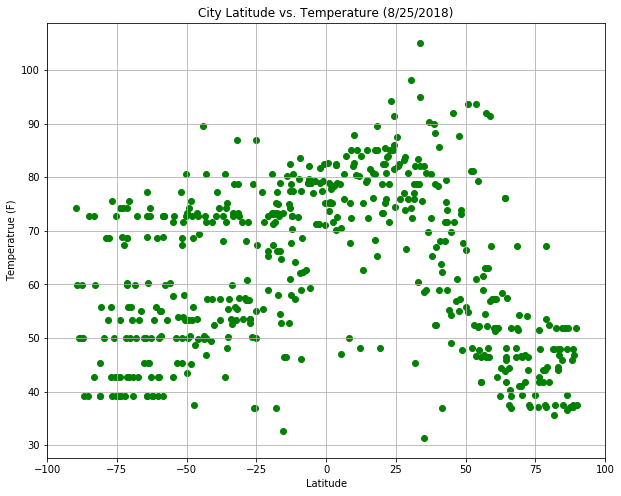

<Figure size 432x288 with 0 Axes>

In [43]:
#City Latitude vs Temp
plot_titlefig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['Latitude'],weather_df['Temperature (F)'], 
            c='g', cmap=plt.cm.coolwarm,)
plt.title('City Latitude vs. Temperature (8/25/2018)')
plt.ylabel('Temperatrue (F)')
plt.xlabel('Latitude')
ax.set_xlim(-100,100)
plt.grid()
plt.show()
plt.savefig('temperature.png')

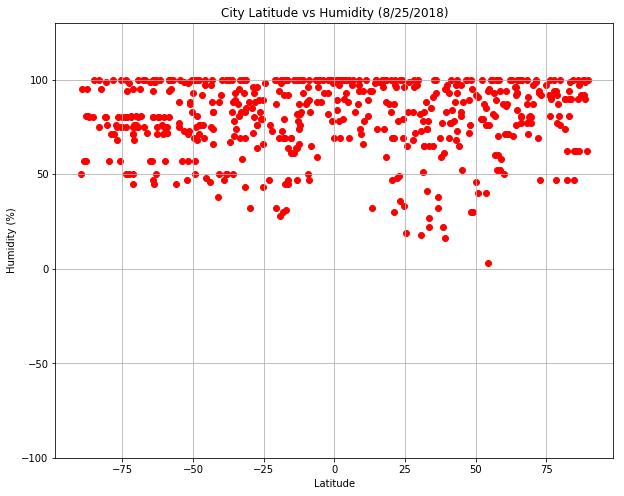

<Figure size 432x288 with 0 Axes>

In [44]:
#City Latitude vs Humidity
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['Latitude'],weather_df['Humidity (%)'], c='r')
plt.title('City Latitude vs Humidity (8/25/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
ax.set_ylim(-100,130)
plt.grid()
plt.show()
plt.savefig('humidity.png')

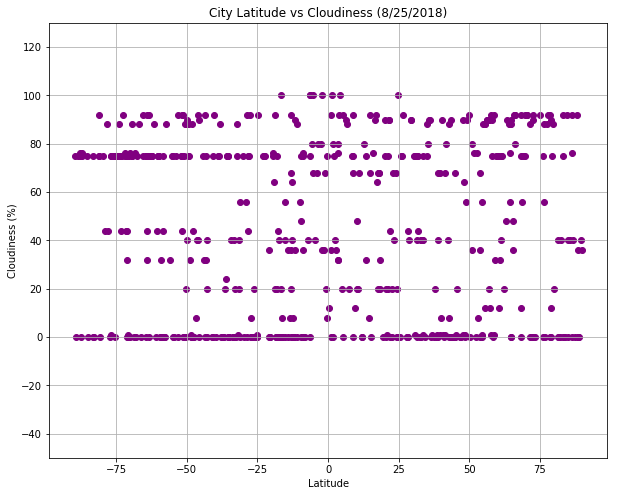

<Figure size 432x288 with 0 Axes>

In [45]:
#City Latitude vs Cloudiness
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['Latitude'],weather_df['Cloudiness (%)'], c='purple')
plt.title('City Latitude vs Cloudiness (8/25/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
ax.set_ylim(-50,130)
plt.grid()
plt.show()
plt.savefig('cloudiness.png')

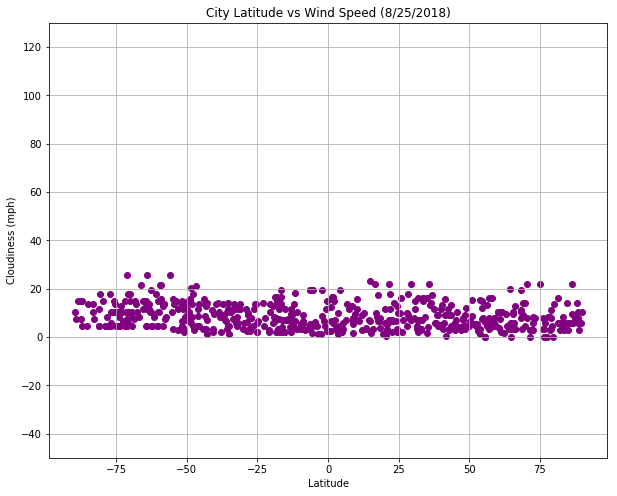

<Figure size 432x288 with 0 Axes>

In [47]:
#City Latitude vs Winde Speed
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['Latitude'],weather_df['Wind Speed (mph)'], c='purple')
plt.title('City Latitude vs Wind Speed (8/25/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (mph)')
ax.set_ylim(-50,130)
plt.grid()
plt.show()
plt.savefig('windspeed.png')

In general it appears there is a correlation. Cities closer to the equartor generally speaking have warmer temperatures. Wind speed however does not appear to increase the closer one is to the equator. There also does not appear to be a strong correlation between cloudiness and the city's proximity to the equator. 